In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection

import matplotlib.patches as mpatches

In [34]:
# # arr_rate = 30
# # pb = 40
# Test Combos

# # model_train = 'yolo'
# # model_infer = 'resnet'

# model_train = 'resnet'
# model_infer = 'mobnet'

# # model_train = 'mobnet'
# # model_infer = 'lstm'

# # model_train = 'bert'
# # model_infer = 'lstm'

# model_train = 'mobnet'
# model_infer = 'mobnet'

# # model_train = 'lstm'
# # model_infer = 'yolo'

# model_train = 'resnet'
# model_infer = 'bert'

In [35]:
# Final Combos

model_train = 'yolo'
model_infer = 'resnet'

model_train = 'resnet'
model_infer = 'mobnet'

model_train = 'mobnet'
model_infer = 'mobnet'

gmd = pd.read_csv(f'/home/saisamarth/exp/interleaved_{model_train}_train_{model_infer}_infer_multi_al.csv')
nnRan250 = pd.read_csv(f'/home/saisamarth/exp/interleaved_{model_train}_train_{model_infer}_infer_nn_random_multi_al.csv')
nnRan50 = pd.read_csv(f'/home/saisamarth/exp/interleaved_{model_train}_train_{model_infer}_infer_nn_alt_random_multi_al.csv')

nnRan50 = nnRan50.add_suffix('_50')
nnRan50.rename(columns={
    'power_budget_50': 'power_budget',
    'time_budget_50': 'time_budget',
    'arr_rate_50': 'arr_rate'
}, inplace=True)

gmd['power_budget'] = gmd['power_budget'].astype(int)
merged_df = pd.merge(gmd, nnRan250, on=['power_budget', 'time_budget', 'arr_rate'], how='outer', suffixes=('_gmd', '_nnRan250'))
merged_df = pd.merge(merged_df, nnRan50, on=['power_budget', 'time_budget', 'arr_rate'], how='outer')

# Display merged DataFrame
merged_df.to_csv('merged_data.csv', index=False)
merged_df.columns

Index(['powermode_algo', 'infer_time_algo', 'bs_algo',
       'interleaved_power_algo', 'power_budget', 'num_train_batches_algo',
       'num_tries_algo', 'time_budget', 'arr_rate', 'powermode_optim',
       'infer_time_optim', 'bs_optim', 'interleaved_power_optim',
       'num_train_batches_optim', 'num_tries_optim', 'powermode_nn',
       'infer_time_nn', 'bs_nn', 'interleaved_power_nn',
       'num_train_batches_nn', 'powermode_random', 'infer_time_random',
       'bs_random', 'interleaved_power_random', 'num_train_batches_random',
       'flag', 'time_scaled', 'time_cond1', 'time_cond2', 'powermode_nn_50',
       'infer_time_nn_50', 'bs_nn_50', 'interleaved_power_nn_50',
       'num_train_batches_nn_50', 'powermode_random_50',
       'infer_time_random_50', 'bs_random_50', 'interleaved_power_random_50',
       'num_train_batches_random_50'],
      dtype='object')

In [36]:
nn50 = merged_df[['bs_nn_50', 'infer_time_nn_50', 'interleaved_power_nn_50', 'power_budget', 'arr_rate', 'time_budget']]
nn50['num_pwds'] = 50
        
nn250 = merged_df[['bs_nn', 'infer_time_nn', 'interleaved_power_nn', 'power_budget', 'arr_rate', 'time_budget']]
nn250['num_pwds'] = 250

gmd = merged_df[['bs_algo', 'infer_time_algo', 'interleaved_power_algo', 'power_budget', 'arr_rate', 'time_budget']]
gmd['num_pwds'] = merged_df['num_tries_algo']

# bs = merged_df[['bs_bs', 'observed_time', 'observed_power', 'power_budget', 'arr_rate', 'time_budget']]
# bs['num_pwds'] = merged_df['num_pwds_bs']

rnd = merged_df[['bs_random_50', 'infer_time_random_50', 'interleaved_power_random_50', 'power_budget', 'arr_rate', 'time_budget']]
rnd['num_pwds'] = 50

optim = merged_df[['bs_optim', 'infer_time_optim', 'interleaved_power_optim', 'power_budget', 'arr_rate', 'time_budget']]


/tmp/ipykernel_619793/2402599152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn50['num_pwds'] = 50
/tmp/ipykernel_619793/2402599152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn250['num_pwds'] = 250
/tmp/ipykernel_619793/2402599152.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [37]:
nn50['penalty'] = 100*((nn50['infer_time_nn_50'] + nn50['bs_nn_50']/nn50['arr_rate']) - (optim['infer_time_optim'] + optim['bs_optim']/optim['arr_rate']))/(optim['infer_time_optim'] + optim['bs_optim']/optim['arr_rate'])
nn250['penalty'] = 100*((nn250['infer_time_nn'] + nn250['bs_nn']/nn250['arr_rate']) - (optim['infer_time_optim'] + optim['bs_optim']/optim['arr_rate']))/(optim['infer_time_optim'] + optim['bs_optim']/optim['arr_rate'])
gmd['penalty'] = 100*((gmd['infer_time_algo'] + gmd['bs_algo']/gmd['arr_rate']) - (optim['infer_time_optim'] + optim['bs_optim']/optim['arr_rate']))/(optim['infer_time_optim'] + optim['bs_optim']/optim['arr_rate'])
# bs['penalty'] = 100*((bs['observed_time'] + bs['bs_bs']/bs['arr_rate']) - (optim['optim_time_bs'] + optim['bs_optimal']/optim['arr_rate']))/(optim['optim_time_bs'] + optim['bs_optimal']/optim['arr_rate'])
rnd['penalty'] = 100*((rnd['infer_time_random_50'] + rnd['bs_random_50']/rnd['arr_rate']) - (optim['infer_time_optim'] + optim['bs_optim']/optim['arr_rate']))/(optim['infer_time_optim'] + optim['bs_optim']/optim['arr_rate'])

/tmp/ipykernel_619793/2062926031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn50['penalty'] = 100*((nn50['infer_time_nn_50'] + nn50['bs_nn_50']/nn50['arr_rate']) - (optim['infer_time_optim'] + optim['bs_optim']/optim['arr_rate']))/(optim['infer_time_optim'] + optim['bs_optim']/optim['arr_rate'])
/tmp/ipykernel_619793/2062926031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn250['penalty'] = 100*((nn250['infer_time_nn'] + nn250['bs_nn']/nn250['arr_rate']) - (optim['infer_time_optim'] + optim[

In [38]:
gmd.dropna(inplace=True)
rnd.dropna(inplace=True)
nn50.dropna(inplace=True)
nn250.dropna(inplace=True)

/tmp/ipykernel_619793/1910297197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gmd.dropna(inplace=True)
/tmp/ipykernel_619793/1910297197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rnd.dropna(inplace=True)
/tmp/ipykernel_619793/1910297197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn50.dropna(inplace=True)
/tmp/ipykernel_619793/1910297197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [39]:
gmd_tries = list(gmd['num_pwds'])
random_tries = list(rnd['num_pwds'])
nn_tries = list(nn50['num_pwds'])
nn250_tries = list(nn250['num_pwds'])

# # rake mean tries for all
gmd_tries_mean = np.mean(gmd_tries)
random_tries_mean = np.mean(random_tries)
nn_tries_mean50 = np.mean(nn_tries)
nn_tries_mean250 = 100

mean_tries_list = [random_tries_mean, nn_tries_mean250, gmd_tries_mean]
mean_tries_list

[50.0, 100, 11.660148470034402]

In [40]:
datalist = [rnd['penalty'].values, nn250['penalty'].values, gmd['penalty'].values]

In [41]:
rnd['penalty_power'] = rnd['interleaved_power_random_50'] - rnd['power_budget']
gmd['penalty_power'] =  gmd['interleaved_power_algo'] - gmd['power_budget']
nn250['penalty_power'] = nn250['interleaved_power_nn'] - nn250['power_budget']

/tmp/ipykernel_619793/309088223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rnd['penalty_power'] = rnd['interleaved_power_random_50'] - rnd['power_budget']
/tmp/ipykernel_619793/309088223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gmd['penalty_power'] =  gmd['interleaved_power_algo'] - gmd['power_budget']
/tmp/ipykernel_619793/309088223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [42]:
gmd[gmd['penalty']<0]

,bs_algo,infer_time_algo,interleaved_power_algo,power_budget,arr_rate,time_budget,num_pwds,penalty,penalty_power
63,16.0,40.101583,30.3920,32,30.0,0.6,13.0,-10.186924,-1.6080
64,16.0,40.101583,30.3920,33,30.0,0.6,13.0,-10.186924,-2.6080
89,4.0,67.217392,16.5570,17,30.0,0.7,18.0,-43.775917,-0.4430
90,4.0,66.918144,17.8650,18,30.0,0.7,17.0,-37.466478,-0.1350
91,4.0,66.918144,17.8650,19,30.0,0.7,17.0,-26.324575,-1.1350
...,...,...,...,...,...,...,...,...,...
5355,32.0,70.927471,34.1545,35,110.0,0.7,10.0,-40.008938,-0.8455
5421,32.0,196.029099,18.7750,19,110.0,0.9,18.0,-17.592626,-0.2250
5997,32.0,143.685951,19.0610,21,120.0,0.7,12.0,-10.854606,-1.9390
5998,32.0,143.685951,19.0610,22,120.0,0.7,13.0,-10.854606,-2.9390


In [43]:
# datalist_time = [rnd['penalty'], nn250['penalty'], gmd['penalty']]
# datalist_power = [rnd['penalty_power'], nn250['penalty_power'], gmd['penalty_power']]
# categories = ['RND', 'NN250', 'GMD']

# # Flatten the lists and create corresponding labels
# data_time_flat = [item for sublist in datalist_time for item in sublist]
# data_power_flat = [item for sublist in datalist_power for item in sublist]
# labels_time = [categories[i] for i, sublist in enumerate(datalist_time) for item in sublist]
# labels_power = [categories[i] for i, sublist in enumerate(datalist_power) for item in sublist]
# type_time = ['time'] * len(data_time_flat)
# type_power = ['power'] * len(data_power_flat)

# # Combine the data and labels
# combined_data = data_time_flat + data_power_flat
# combined_labels = labels_time + labels_power
# combined_types = type_time + type_power

# # Create a DataFrame
# df = pd.DataFrame({
#     'Penalty': combined_data,
#     'Strategy': combined_labels,
#     'type': combined_types
# })

# # Set the plot style
# sns.set(style="whitegrid")

# # Define custom palette colors
# colors = {'time': '#fadc6f', 'power': '#e36668'}

# # Create figure and axes
# fig, ax = plt.subplots(figsize=(6, 6))

# # Create the violin plot
# sns.violinplot(x='Strategy', y='Penalty', hue='type', data=df, palette=colors, split=True, scale="count", cut=0, ax=ax)
# ax.set_xlabel('')
# ax.set_ylabel('Distance from Optimal', fontsize=20)

# # Add dark line at y=0
# ax.axhline(0, color='black', linewidth=1)

# # Add median markers
# medians_time = [np.median(data) for data in datalist_time]
# medians_power = [np.median(data) for data in datalist_power]


# if model_train == 'yolo' and model_infer == 'resnet':
#     for i, median in enumerate(medians_time):
#         ax.text(i-0.4, median - 10.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#     for i, median in enumerate(medians_power):
#         ax.text(i+0.4, median - 10.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)

#     ax.set_ylim(-200, 200)
#     ax.set_yticks([-200, -100, 0, 100, 200])
#     ax.tick_params(axis='y', labelsize=20)

# elif model_train == 'resnet' and model_infer == 'mobnet':
#     for i, median in enumerate(medians_time):
#         ax.text(i-0.4, median - 8.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#     for i, median in enumerate(medians_power):
#         ax.text(i+0.4, median - 20.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)
#     ax.set_ylim(-200, 200)
#     ax.set_yticks([-200, -100, 0, 100, 200])
#     ax.tick_params(axis='y', labelsize=20)

# elif model_train == 'mobnet' and model_infer == 'lstm':
#     for i, median in enumerate(medians_time):
#         ax.text(i-0.4, median - 8.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#     for i, median in enumerate(medians_power):
#         ax.text(i+0.4, median - 20.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)
#     ax.set_ylim(-200, 3500)
#     # ax.set_yticks([-200, -100, 0, 100, 200])
#     ax.tick_params(axis='y', labelsize=20)


# else:
#     for i, median in enumerate(medians_time):
#         ax.text(i-0.4, median - 10.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#     for i, median in enumerate(medians_power):
#         ax.text(i+0.4, median - 10.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)
#     ax.set_ylim(-200, 200)
#     ax.set_yticks([-200, -100, 0, 100, 200])
#     ax.tick_params(axis='y', labelsize=20)


# # Add minor and major grid lines with a lower zorder value
# ax.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
# ax.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')
# ax.set_axisbelow(True)

# # Set y-axis limits and ticks

# # Add secondary y-axis (ax2)
# ax2 = ax.twinx()
# for i, value in enumerate(mean_tries_list):
#     ax2.plot(i, value, marker='D', markersize=8, color='blue', linestyle='None')

# ax2.text(categories.index('NN250'), 103, f'{250}', ha='center', va='center', fontsize=18, color='blue')

# ax2.set_ylabel('Num Tries', fontsize=20, color='blue')
# ax2.set_ylim(0, 100)
# ax2.set_yticks([0, 25, 50, 75, 100])
# ax2.tick_params(axis='y', labelsize=20, colors='blue')
# ax2.spines['right'].set_color('blue')
# ax2.grid(False)

# ax.set_xticklabels(categories, fontsize=20)

# ax.legend(fontsize=18)
# plt.tight_layout()
# # plt.savefig('Dual_Violin_train_'+model+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
# plt.savefig('dual_violin_'+model_train+'_train_'+model_infer+'_infer'+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
# plt.show()


/tmp/ipykernel_619793/2883003928.py:35: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Strategy', y='Penalty', hue='type', data=df, palette=colors, split=True, scale="count", cut=0, ax=ax)
/tmp/ipykernel_619793/2883003928.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, fontsize=24)


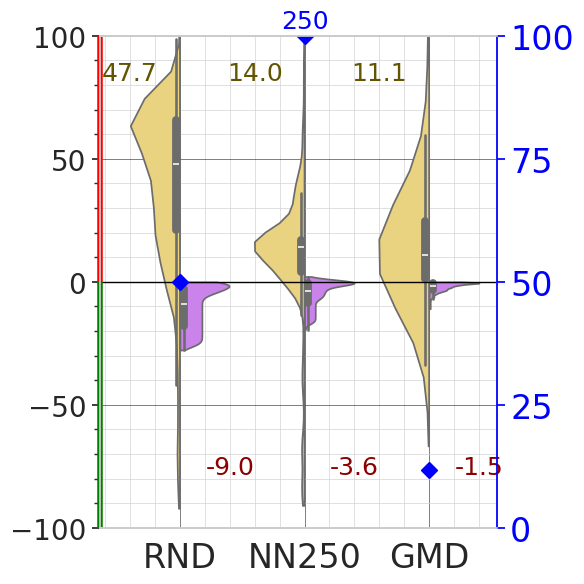

In [44]:
datalist_time = [rnd['penalty'], nn250['penalty'], gmd['penalty']]
datalist_power = [rnd['penalty_power'], nn250['penalty_power'], gmd['penalty_power']]
categories = ['RND', 'NN250', 'GMD']

# Flatten the lists and create corresponding labels
data_time_flat = [item for sublist in datalist_time for item in sublist]
data_power_flat = [item for sublist in datalist_power for item in sublist]
labels_time = [categories[i] for i, sublist in enumerate(datalist_time) for item in sublist]
labels_power = [categories[i] for i, sublist in enumerate(datalist_power) for item in sublist]
type_time = ['latency'] * len(data_time_flat)
type_power = ['power'] * len(data_power_flat)

# Combine the data and labels
combined_data = data_time_flat + data_power_flat
combined_labels = labels_time + labels_power
combined_types = type_time + type_power

# Create a DataFrame
df = pd.DataFrame({
    'Penalty': combined_data,
    'Strategy': combined_labels,
    'type': combined_types
})

# Set the plot style
sns.set(style="whitegrid")

# Define custom palette colors
colors = {'latency': '#fadc6f', 'power': '#cf71fd'}

# Create figure and axes
fig, ax = plt.subplots(figsize=(6, 6))
ax.spines["left"].set_visible(False)
# Create the violin plot
sns.violinplot(x='Strategy', y='Penalty', hue='type', data=df, palette=colors, split=True, scale="count", cut=0, ax=ax)
ax.set_xlabel('')
if model_train == 'yolo' and model_infer == 'resnet':
    ax.set_ylabel('Excess Over Optimal', fontsize=24)
else:
    ax.set_ylabel('')

# Add dark line at y=0
ax.axhline(0, color='black', linewidth=1)

# Add median markers
medians_time = [np.median(data) for data in datalist_time]
medians_power = [np.median(data) for data in datalist_power]



if model_train == 'mobnet' and model_infer == 'mobnet':
    ax.set_ylim(-100, 100)
    ax.set_yticks([-100, -50, 0, 50, 100])
    for i, median in enumerate(medians_time):
        ax.text(i-0.4, 80, f"{median:.1f}", color='#635402', ha='center', va='bottom', fontsize=18)

    for i, median in enumerate(medians_power):
        ax.text(i+0.4, -80, f"{median:.1f}", color='#8B0000', ha='center', va='bottom', fontsize=18)

else:
    for i, median in enumerate(medians_time):
        ax.text(i-0.4, 100, f"{median:.1f}", color='#635402', ha='center', va='bottom', fontsize=18)

    for i, median in enumerate(medians_power):
        ax.text(i+0.4, -100, f"{median:.1f}", color='#8B0000', ha='center', va='bottom', fontsize=18)

    ax.set_ylim(-200, 200)
    ax.set_yticks([-200, -100, 0, 100, 200])


# Add minor and major grid lines with a lower zorder value
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=0.7)
ax.grid(which='minor', linestyle='-', linewidth='0.5', color='lightgray')
ax.set_axisbelow(True)
# Set y-axis limits and ticks
if model_train == 'mobnet' and model_infer == 'mobnet':
    upper = 101
    lower = -100
else:
    upper = 201
    lower = -200


# Create LineCollection to color y-axis differently for negative and positive values
colors_y_axis = ["green" if y < 0 else "red" for y in range(lower, upper)]
y_ticks = list(range(lower, upper))
x_ticks = [0] * len(y_ticks)
points = np.array([x_ticks, y_ticks]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, colors=colors_y_axis, linewidth=4, transform=ax.get_yaxis_transform(), clip_on=False)
ax.add_collection(lc)

ax.spines["left"].set_visible(False)  # Hide the left spine
if model_train == 'mobnet' and model_infer == 'mobnet':
    ax.set_ylim(-100, 100)
    ax.set_yticks(np.arange(lower, upper, 50))
else:
    ax.set_ylim(-200, 200)
    ax.set_yticks(np.arange(lower, upper, 100))
ax.tick_params(axis='y', labelsize=20)

# Add secondary y-axis (ax2)
ax2 = ax.twinx()
for i, value in enumerate(mean_tries_list):
    ax2.plot(i, value, marker='D', markersize=8, color='blue', linestyle='None')

ax2.text(categories.index('NN250'), 103, f'{250}', ha='center', va='center', fontsize=18, color='blue')

ax2.set_ylim(0, 100)
ax2.set_yticks([0, 25, 50, 75, 100])
ax2.tick_params(axis='y', labelsize=24, colors='blue')
ax2.spines['right'].set_color('blue')
ax2.grid(False)

ax.set_xticklabels(categories, fontsize=24)

if model_train == 'mobnet' and model_infer == 'mobnet':
    ax.legend().remove()
elif model_train == 'resnet' and model_infer == 'mobnet':
    ax2.set_ylabel('# Profiling Runs', fontsize=24, color='blue')
    ax.legend().remove()
else:
    ax.text(-1.5, +25, '(W)', color='#b420fd', fontsize=20, rotation=90)
    ax.text(-1.5, -25, '(%)', color='#f7c81e', fontsize=20, rotation=90)
    ax.legend(fontsize=20)
    
plt.tight_layout()
# plt.savefig('Dual_Violin_train_'+model+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
plt.savefig('dual_violin_'+model_train+'_train_'+model_infer+'_infer'+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
plt.show()


In [45]:
# if model_train == 'resnet' and model_infer == 'mobnet':# Reordered labels
#     datalist_time = [rnd['penalty'], nn250['penalty'], gmd['penalty']]
#     datalist_power = [rnd['penalty_power'], nn250['penalty_power'], gmd['penalty_power']]
#     categories = ['RND', 'NN250', 'GMD']

#     # Flatten the lists and create corresponding labels
#     data_time_flat = [item for sublist in datalist_time for item in sublist]
#     data_power_flat = [item for sublist in datalist_power for item in sublist]
#     labels_time = [categories[i] for i, sublist in enumerate(datalist_time) for item in sublist]
#     labels_power = [categories[i] for i, sublist in enumerate(datalist_power) for item in sublist]
#     type_time = ['time'] * len(data_time_flat)
#     type_power = ['power'] * len(data_power_flat)

#     # Combine the data and labels
#     combined_data = data_time_flat + data_power_flat
#     combined_labels = labels_time + labels_power
#     combined_types = type_time + type_power

#     # Create a DataFrame
#     df = pd.DataFrame({
#         'Penalty': combined_data,
#         'Strategy': combined_labels,
#         'type': combined_types
#     })

#     # Set the plot style
#     sns.set(style="whitegrid")

#     # Define custom palette colors
#     colors = {'time': '#fadc6f', 'power': '#e36668'}

#     # Create figure and axes
#     fig, ax = plt.subplots(figsize=(6, 6))

#     # Create the violin plot
#     sns.violinplot(x='Strategy', y='Penalty', hue='type', data=df, palette=colors, split=True, scale="count", cut=0, ax=ax)
#     ax.set_xlabel('')
#     ax.set_ylabel('', fontsize=24)

#     # Add dark line at y=0
#     ax.axhline(0, color='black', linewidth=1)

#     # Add median markers
#     medians_time = [np.median(data) for data in datalist_time]
#     medians_power = [np.median(data) for data in datalist_power]


#     if model_train == 'yolo' and model_infer == 'resnet':
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 10.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 10.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)

#         ax.set_ylim(-200, 200)
#         ax.set_yticks([-200, -100, 0, 100, 200])

#     elif model_train == 'resnet' and model_infer == 'mobnet':
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 8.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 20.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)
#         ax.set_ylim(-200, 200)
#         ax.set_yticks([-200, -100, 0, 100, 200])

#     elif model_train == 'mobnet' and model_infer == 'lstm':
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 8.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 20.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)
#         ax.set_ylim(-200, 3500)
#         # ax.set_yticks([-200, -100, 0, 100, 200])


#     else:
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 10.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 10.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)
#         ax.set_ylim(-200, 200)
#         ax.set_yticks([-200, -100, 0, 100, 200])
    
#     ax.tick_params(axis='y', labelsize=24)


#     # Add minor and major grid lines with a lower zorder value
#     ax.minorticks_on()
#     ax.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
#     ax.grid(which='minor', linestyle='-', linewidth='0.5', color='lightgray')
#     ax.set_axisbelow(True)
    
#     # Set y-axis limits and ticks

#     # Add secondary y-axis (ax2)
#     ax2 = ax.twinx()
#     for i, value in enumerate(mean_tries_list):
#         ax2.plot(i, value, marker='D', markersize=8, color='blue', linestyle='None')

#     ax2.text(categories.index('NN250'), 103, f'{250}', ha='center', va='center', fontsize=18, color='blue')

#     ax2.set_ylabel('Num Tries', fontsize=24, color='blue')
#     ax2.set_ylim(0, 100)
#     ax2.set_yticks([0, 25, 50, 75, 100])
#     ax2.tick_params(axis='y', labelsize=24, colors='blue')
#     ax2.spines['right'].set_color('blue')
#     ax2.grid(False)

#     ax.set_xticklabels(categories, fontsize=24, rotation=45)

#     ax.legend(fontsize=18)
#     plt.tight_layout()
#     # plt.savefig('Dual_Violin_train_'+model+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
#     plt.savefig('dual_violin_'+model_train+'_train_'+model_infer+'_infer'+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
#     plt.show()


In [46]:
# if model_train == 'mobnet' and model_infer == 'lstm':# Reordered labels
#     datalist_time = [rnd['penalty'], nn250['penalty'], gmd['penalty']]
#     datalist_power = [rnd['penalty_power'], nn250['penalty_power'], gmd['penalty_power']]
#     categories = ['RND', 'NN250', 'GMD']

#     # Flatten the lists and create corresponding labels
#     data_time_flat = [item for sublist in datalist_time for item in sublist]
#     data_power_flat = [item for sublist in datalist_power for item in sublist]
#     labels_time = [categories[i] for i, sublist in enumerate(datalist_time) for item in sublist]
#     labels_power = [categories[i] for i, sublist in enumerate(datalist_power) for item in sublist]
#     type_time = ['time'] * len(data_time_flat)
#     type_power = ['power'] * len(data_power_flat)

#     # Combine the data and labels
#     combined_data = data_time_flat + data_power_flat
#     combined_labels = labels_time + labels_power
#     combined_types = type_time + type_power

#     # Create a DataFrame
#     df = pd.DataFrame({
#         'Penalty': combined_data,
#         'Strategy': combined_labels,
#         'type': combined_types
#     })

#     # Set the plot style
#     sns.set(style="whitegrid")

#     # Define custom palette colors
#     colors = {'time': '#fadc6f', 'power': '#e36668'}

#     # Create figure and axes
#     fig, ax = plt.subplots(figsize=(6, 6))

#     # Create the violin plot
#     sns.violinplot(x='Strategy', y='Penalty', hue='type', data=df, palette=colors, split=True, scale="count", cut=0, ax=ax)
#     ax.set_xlabel('')
#     ax.set_ylabel('', fontsize=24)

#     # Add dark line at y=0
#     ax.axhline(0, color='black', linewidth=1)

#     # Add median markers
#     medians_time = [np.median(data) for data in datalist_time]
#     medians_power = [np.median(data) for data in datalist_power]


#     if model_train == 'yolo' and model_infer == 'resnet':
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 10.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 10.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)

#         ax.set_ylim(-200, 200)
#         ax.set_yticks([-200, -100, 0, 100, 200])

#     elif model_train == 'resnet' and model_infer == 'mobnet':
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 8.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 20.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)
#         ax.set_ylim(-200, 200)
#         ax.set_yticks([-200, -100, 0, 100, 200])

#     elif model_train == 'mobnet' and model_infer == 'lstm':
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 8.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 20.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)
#         ax.set_ylim(-200, 3500)
#         # ax.set_yticks([-200, -100, 0, 100, 200])


#     else:
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 10.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 10.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)
#         ax.set_ylim(-200, 200)
#         ax.set_yticks([-200, -100, 0, 100, 200])
    
#     ax.tick_params(axis='y', labelsize=24)


#     # Add minor and major grid lines with a lower zorder value
#     ax.minorticks_on()
#     ax.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
#     ax.grid(which='minor', linestyle='-', linewidth='0.5', color='lightgray')
#     ax.set_axisbelow(True)

#     # Set y-axis limits and ticks

#     # Add secondary y-axis (ax2)
#     ax2 = ax.twinx()
#     for i, value in enumerate(mean_tries_list):
#         ax2.plot(i, value, marker='D', markersize=8, color='blue', linestyle='None')

#     ax2.text(categories.index('NN250'), 103, f'{250}', ha='center', va='center', fontsize=18, color='blue')

#     # ax2.set_ylabel('Num Tries', fontsize=24, color='blue')
#     ax2.set_ylim(0, 100)
#     ax2.set_yticks([0, 25, 50, 75, 100])
#     ax2.tick_params(axis='y', labelsize=24, colors='blue')
#     ax2.spines['right'].set_color('blue')
#     ax2.grid(False)

#     ax.set_xticklabels(categories, fontsize=24, rotation=45)

#     ax.legend(fontsize=18)
#     plt.tight_layout()
#     # plt.savefig('Dual_Violin_train_'+model+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
#     plt.savefig('dual_violin_'+model_train+'_train_'+model_infer+'_infer'+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
#     plt.show()


In [47]:
# if model_train == 'mobnet' and model_infer == 'mobnet':# Reordered labels
#     datalist_time = [rnd['penalty'], nn250['penalty'], gmd['penalty']]
#     datalist_power = [rnd['penalty_power'], nn250['penalty_power'], gmd['penalty_power']]
#     categories = ['RND', 'NN250', 'GMD']

#     # Flatten the lists and create corresponding labels
#     data_time_flat = [item for sublist in datalist_time for item in sublist]
#     data_power_flat = [item for sublist in datalist_power for item in sublist]
#     labels_time = [categories[i] for i, sublist in enumerate(datalist_time) for item in sublist]
#     labels_power = [categories[i] for i, sublist in enumerate(datalist_power) for item in sublist]
#     type_time = ['time'] * len(data_time_flat)
#     type_power = ['power'] * len(data_power_flat)

#     # Combine the data and labels
#     combined_data = data_time_flat + data_power_flat
#     combined_labels = labels_time + labels_power
#     combined_types = type_time + type_power

#     # Create a DataFrame
#     df = pd.DataFrame({
#         'Penalty': combined_data,
#         'Strategy': combined_labels,
#         'type': combined_types
#     })

#     # Set the plot style
#     sns.set(style="whitegrid")

#     # Define custom palette colors
#     colors = {'time': '#fadc6f', 'power': '#e36668'}

#     # Create figure and axes
#     fig, ax = plt.subplots(figsize=(6, 6))

#     # Create the violin plot
#     sns.violinplot(x='Strategy', y='Penalty', hue='type', data=df, palette=colors, split=True, scale="count", cut=0, ax=ax)
#     ax.set_xlabel('')
#     ax.set_ylabel('', fontsize=24)

#     # Add dark line at y=0
#     ax.axhline(0, color='black', linewidth=1)

#     # Add median markers
#     medians_time = [np.median(data) for data in datalist_time]
#     medians_power = [np.median(data) for data in datalist_power]


#     if model_train == 'yolo' and model_infer == 'resnet':
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 10.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 10.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)

#         ax.set_ylim(-200, 200)
#         ax.set_yticks([-200, -100, 0, 100, 200])

#     elif model_train == 'resnet' and model_infer == 'mobnet':
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 8.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 20.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)
#         ax.set_ylim(-200, 200)
#         ax.set_yticks([-200, -100, 0, 100, 200])

#     elif model_train == 'mobnet' and model_infer == 'lstm':
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 8.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 20.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)
#         ax.set_ylim(-200, 3500)
#         # ax.set_yticks([-200, -100, 0, 100, 200])


#     else:
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 10.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 10.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)
#         ax.set_ylim(-100, 100)
#         ax.set_yticks([-100, -50, 0, 50, 100])
    
#     ax.tick_params(axis='y', labelsize=24)


#     # Add minor and major grid lines with a lower zorder value
#     ax.minorticks_on()
#     ax.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
#     ax.grid(which='minor', linestyle='-', linewidth='0.5', color='lightgray')
#     ax.set_axisbelow(True)

#     # Set y-axis limits and ticks

#     # Add secondary y-axis (ax2)
#     ax2 = ax.twinx()
#     for i, value in enumerate(mean_tries_list):
#         ax2.plot(i, value, marker='D', markersize=8, color='blue', linestyle='None')

#     ax2.text(categories.index('NN250'), 103, f'{250}', ha='center', va='center', fontsize=18, color='blue')

#     # ax2.set_ylabel('Num Tries', fontsize=24, color='blue')
#     ax2.set_ylim(0, 100)
#     ax2.set_yticks([0, 25, 50, 75, 100])
#     ax2.tick_params(axis='y', labelsize=24, colors='blue')
#     ax2.spines['right'].set_color('blue')
#     ax2.grid(False)

#     ax.set_xticklabels(categories, fontsize=24, rotation=45)

#     ax.legend(fontsize=18)
#     plt.tight_layout()
#     # plt.savefig('Dual_Violin_train_'+model+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
#     plt.savefig('dual_violin_'+model_train+'_train_'+model_infer+'_infer'+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
#     plt.show()


In [48]:
# if model_train == 'resnet' and model_infer == 'bert':# Reordered labels
#     datalist_time = [rnd['penalty'], nn250['penalty'], gmd['penalty']]
#     datalist_power = [rnd['penalty_power'], nn250['penalty_power'], gmd['penalty_power']]
#     categories = ['RND', 'NN250', 'GMD']

#     # Flatten the lists and create corresponding labels
#     data_time_flat = [item for sublist in datalist_time for item in sublist]
#     data_power_flat = [item for sublist in datalist_power for item in sublist]
#     labels_time = [categories[i] for i, sublist in enumerate(datalist_time) for item in sublist]
#     labels_power = [categories[i] for i, sublist in enumerate(datalist_power) for item in sublist]
#     type_time = ['time'] * len(data_time_flat)
#     type_power = ['power'] * len(data_power_flat)

#     # Combine the data and labels
#     combined_data = data_time_flat + data_power_flat
#     combined_labels = labels_time + labels_power
#     combined_types = type_time + type_power

#     # Create a DataFrame
#     df = pd.DataFrame({
#         'Penalty': combined_data,
#         'Strategy': combined_labels,
#         'type': combined_types
#     })

#     # Set the plot style
#     sns.set(style="whitegrid")

#     # Define custom palette colors
#     colors = {'time': '#fadc6f', 'power': '#e36668'}

#     # Create figure and axes
#     fig, ax = plt.subplots(figsize=(6, 6))

#     # Create the violin plot
#     sns.violinplot(x='Strategy', y='Penalty', hue='type', data=df, palette=colors, split=True, scale="count", cut=0, ax=ax)
#     ax.set_xlabel('')
#     ax.set_ylabel('', fontsize=24)

#     # Add dark line at y=0
#     ax.axhline(0, color='black', linewidth=1)

#     # Add median markers
#     medians_time = [np.median(data) for data in datalist_time]
#     medians_power = [np.median(data) for data in datalist_power]


#     if model_train == 'yolo' and model_infer == 'resnet':
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 10.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 10.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)

#         ax.set_ylim(-200, 200)
#         ax.set_yticks([-200, -100, 0, 100, 200])

#     elif model_train == 'resnet' and model_infer == 'mobnet':
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 8.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 20.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)
#         ax.set_ylim(-200, 200)
#         ax.set_yticks([-200, -100, 0, 100, 200])

#     elif model_train == 'mobnet' and model_infer == 'lstm':
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 8.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 20.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)
#         ax.set_ylim(-200, 3500)
#         # ax.set_yticks([-200, -100, 0, 100, 200])


#     else:
#         for i, median in enumerate(medians_time):
#             ax.text(i-0.4, median - 10.4, f"{median:.2f}", color='#635402', ha='center', va='bottom', fontsize=18)

#         for i, median in enumerate(medians_power):
#             ax.text(i+0.4, median - 10.4, f"{median:.2f}", color='#8B0000', ha='center', va='bottom', fontsize=18)
#         ax.set_ylim(-200, 200)
#         ax.set_yticks([-200, -100, 0, 100, 200])
    
#     ax.tick_params(axis='y', labelsize=24)


#     # Add minor and major grid lines with a lower zorder value
#     ax.minorticks_on()
#     ax.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
#     ax.grid(which='minor', linestyle='-', linewidth='0.5', color='lightgray')
#     ax.set_axisbelow(True)
#     # Set y-axis limits and ticks

#     # Add secondary y-axis (ax2)
#     ax2 = ax.twinx()
#     for i, value in enumerate(mean_tries_list):
#         ax2.plot(i, value, marker='D', markersize=8, color='blue', linestyle='None')

#     ax2.text(categories.index('NN250'), 103, f'{250}', ha='center', va='center', fontsize=18, color='blue')

#     ax2.set_ylabel('Num Tries', fontsize=24, color='blue')
#     ax2.set_ylim(0, 100)
#     ax2.set_yticks([0, 25, 50, 75, 100])
#     ax2.tick_params(axis='y', labelsize=24, colors='blue')
#     ax2.spines['right'].set_color('blue')
#     ax2.grid(False)

#     ax.set_xticklabels(categories, fontsize=24, rotation=45)

#     ax.legend(fontsize=18)
#     plt.tight_layout()
#     # plt.savefig('Dual_Violin_train_'+model+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
#     plt.savefig('dual_violin_'+model_train+'_train_'+model_infer+'_infer'+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
#     plt.show()
